# Biblioteca: Análise Descritiva 

## Parte I: Importando os dados

In [1]:
!pip install --upgrade jinja2

In [2]:
import pandas as pd
import glob
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
arquivos = glob.glob("dados/*.csv")

emprestimos_biblioteca = pd.DataFrame()
for i in arquivos:
    csv = pd.read_csv(i)
    emprestimos_biblioteca = emprestimos_biblioteca.append(csv)
    
emprestimos_biblioteca.head()

C:\Users\User\AppData\Local\Temp\ipykernel_16672\2661347397.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emprestimos_biblioteca = emprestimos_biblioteca.append(csv)
C:\Users\User\AppData\Local\Temp\ipykernel_16672\2661347397.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emprestimos_biblioteca = emprestimos_biblioteca.append(csv)
C:\Users\User\AppData\Local\Temp\ipykernel_16672\2661347397.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emprestimos_biblioteca = emprestimos_biblioteca.append(csv)
C:\Users\User\AppData\Local\Temp\ipykernel_16672\2661347397.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emprestimos_bibl

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


In [4]:
dados_exemplares = pd.read_parquet('dados/dados_exemplares.parquet')
dados_exemplares.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [5]:
emprestimos_completo = emprestimos_biblioteca.merge(dados_exemplares)
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


## Parte II: Entendendo e tratando os dados

In [6]:
emprestimos_completo.shape

(2072558, 13)

In [7]:
emprestimos_completo.dtypes

id_emprestimo             int64
codigo_barras            object
data_renovacao           object
data_emprestimo          object
data_devolucao           object
matricula_ou_siape      float64
tipo_vinculo_usuario     object
id_exemplar               int64
colecao                  object
biblioteca               object
status_material          object
localizacao               int64
registro_sistema          int64
dtype: object

In [8]:
emprestimos_completo.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1162088
data_emprestimo               0
data_devolucao             6178
matricula_ou_siape         2893
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
registro_sistema              0
dtype: int64

In [9]:
emprestimos_completo = emprestimos_completo.drop(columns = 'registro_sistema', axis = 1)

In [10]:
emprestimos_completo = emprestimos_completo.dropna(subset=['matricula_ou_siape'])

In [11]:
emprestimos_completo["matricula_ou_siape"] = emprestimos_completo["matricula_ou_siape"].values.astype('str')

In [12]:
emprestimos_completo.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1159862
data_emprestimo               0
data_devolucao             6167
matricula_ou_siape            0
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
dtype: int64

In [13]:
emprestimos_completo = emprestimos_completo.drop_duplicates()

In [14]:
nova_coluna = []
for linha in emprestimos_completo['localizacao']:
    if linha <= 99:    
        nova_coluna.append('Generalidades. Ciência e conhecimento')
    elif 199 >= linha >= 100:  
        nova_coluna.append('Filosofia e psicologia')
    elif 299 >= linha >= 200:  
        nova_coluna.append('Religião')
    elif 399 >= linha >= 300:  
        nova_coluna.append('Ciências sociais')
    elif 499 >= linha >= 400:  
        nova_coluna.append('Classe vaga. Provisoriamente não ocupada')
    elif 599 >= linha >= 500:  
        nova_coluna.append('Matemática e ciências naturais')
    elif 699 >= linha >= 600:  
        nova_coluna.append('Ciências aplicadas')
    elif 799 >= linha >= 700:  
        nova_coluna.append('Linguagem. Língua. Linguística')
    elif 899 >= linha >= 800:  
        nova_coluna.append('Belas artes')
    elif linha >= 900:  
        nova_coluna.append('Geografia. Biografia. História')

In [15]:
emprestimos_completo['classe_geral'] = nova_coluna

In [16]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
5,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
6,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


## Parte III: Analisando os dados 

In [17]:
emprestimo_ano = [i[:4] for i in emprestimos_completo.data_emprestimo]

In [18]:
contagem = Counter(emprestimo_ano)

In [19]:
emprestimo_anual = pd.DataFrame.from_dict(contagem, orient='index').reset_index()

In [20]:
emprestimo_anual.rename(columns = {'index': 'Ano', 0: 'Empréstimos'}, inplace=True)

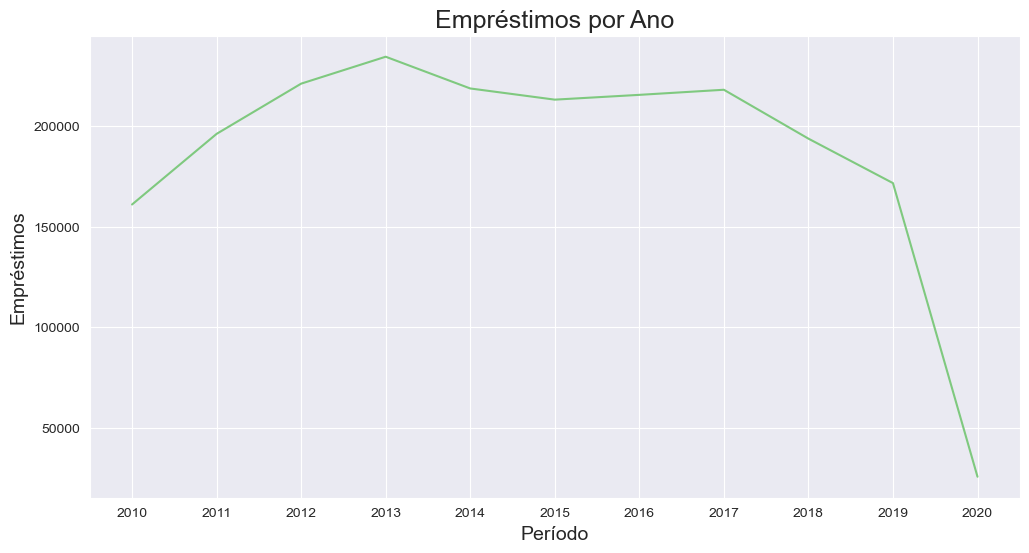

In [21]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = emprestimo_anual.Ano, y = emprestimo_anual['Empréstimos'], data=emprestimo_anual)
ax.figure.set_size_inches(12,6)
ax.set_title('Empréstimos por Ano', fontsize = 18)
ax.set_xlabel('Período', fontsize = 14)
ax.set_ylabel('Empréstimos', fontsize = 14)
ax = ax

### Obervação I: O número de empretimos está em uma tendência de queda desde 2013. 

In [22]:
emprestimo_mensal = [i[5:7] for i in emprestimos_completo.data_emprestimo]

In [23]:
contagem = Counter(emprestimo_mensal)

In [24]:
emprestimo_mensal = pd.DataFrame.from_dict(contagem, orient='index').reset_index()

In [25]:
emprestimo_mensal.rename(columns = {'index': 'Mês', 0: 'Empréstimos'}, inplace=True)

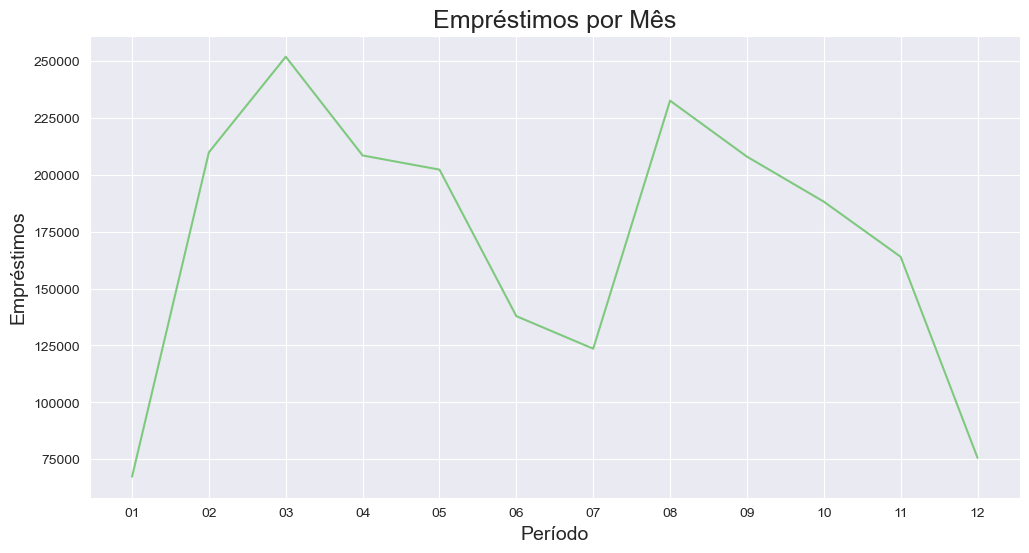

In [26]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = emprestimo_mensal['Mês'], y = emprestimo_mensal['Empréstimos'], data=emprestimo_mensal)
ax.figure.set_size_inches(12,6)
ax.set_title('Empréstimos por Mês', fontsize = 18)
ax.set_xlabel('Período', fontsize = 14)
ax.set_ylabel('Empréstimos', fontsize = 14)
ax = ax

### Obersevação II: Segundo os dados, os meses de março e agosto possuem os maiores números de empréstimos. 

In [27]:
emprestimo_diario_str = [i[11:13] for i in emprestimos_completo.data_emprestimo]
emprestimo_diario = []
for i in emprestimo_diario_str:
    emprestimo_diario.append(int(i))
    
emprestimo_diario.sort()

In [28]:
contagem = Counter(emprestimo_diario)
emprestimo_diario = pd.DataFrame.from_dict(contagem, orient='index').reset_index()
emprestimo_diario.rename(columns = {'index': 'Horário', 0: 'Empréstimos'}, inplace=True)

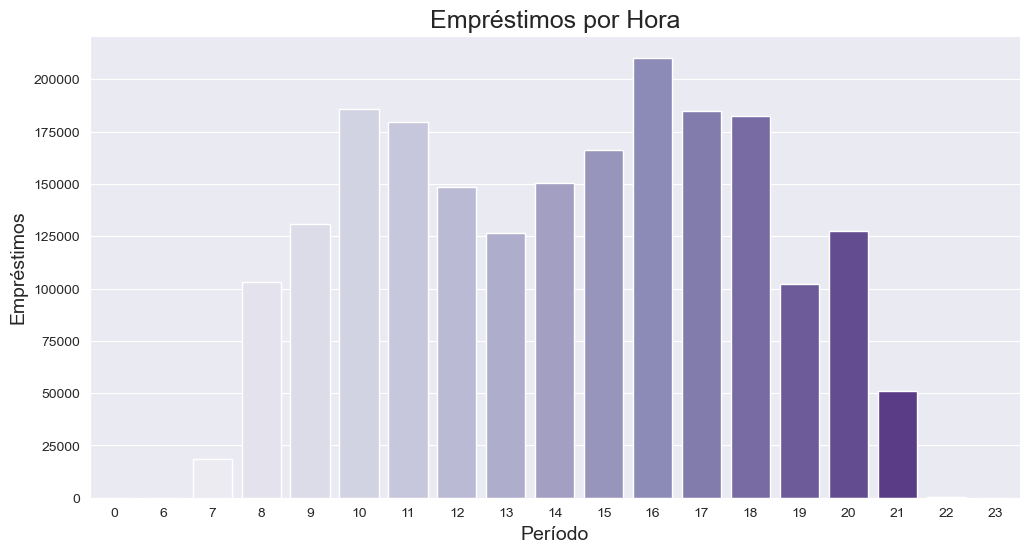

In [29]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(x = emprestimo_diario['Horário'], y = emprestimo_diario['Empréstimos'], data=emprestimo_diario, palette='Purples')
ax.figure.set_size_inches(12,6)
ax.set_title('Empréstimos por Hora', fontsize = 18)
ax.set_xlabel('Período', fontsize = 14)
ax.set_ylabel('Empréstimos', fontsize = 14)
ax = ax

### Observação III: Os horários por volta de 10 da manhã e 16 da tarde. 

In [30]:
def divisao_percentual(coluna, base_dados):
    valores = base_dados[coluna].value_counts(normalize=True).map("{:.1%}".format)
    valores = pd.DataFrame(valores)
    return valores

In [31]:
divisao_percentual("biblioteca", emprestimos_completo)

,biblioteca
Biblioteca Central Zila Mamede,68.9%
Biblioteca Setorial do Centro Ciências da Saúde - CCS,5.7%
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,3.7%
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,3.1%
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,3.0%
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,2.2%
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",2.0%
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,1.6%
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,1.4%
Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ - Macaiba,1.3%


### Observação IV: A maior parte dos empréstimos é na Biblioteca Central Zila Mamede (68,9%), sendo que as outras representam apenas pequenas frações.  

In [32]:
divisao_percentual("classe_geral", emprestimos_completo)

,classe_geral
Ciências aplicadas,68.8%
Ciências sociais,17.8%
Matemática e ciências naturais,3.3%
Generalidades. Ciência e conhecimento,3.0%
Religião,3.0%
Filosofia e psicologia,2.9%
Geografia. Biografia. História,0.4%
Linguagem. Língua. Linguística,0.4%
Belas artes,0.4%


### Observação V: A maior parte dos exemplares empréstados pertencem, esmagadoramente, à categoria de Ciências aplicadas (68,8%), seguida pela de Ciências sociais (17,8%).  

In [33]:
divisao_percentual("tipo_vinculo_usuario", emprestimos_completo)

,tipo_vinculo_usuario
ALUNO DE GRADUAÇÃO,77.9%
ALUNO DE PÓS-GRADUAÇÃO,14.6%
DOCENTE,3.4%
SERVIDOR TÉCNICO-ADMINISTRATIVO,1.5%
ALUNO MÉDIO/TÉCNICO,1.4%
DOCENTE EXTERNO,1.2%
USUÁRIO EXTERNO,0.0%


### Observação VI: A maior parte do vínculo são de estudantes da gradução (77,9%), seguidos pelos da pós-graduação (14,6%). 

In [34]:
selecao = emprestimos_completo['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO'
emprestimos_graduacao = emprestimos_completo[selecao]

In [35]:
divisao_percentual("classe_geral", emprestimos_graduacao)

,classe_geral
Ciências aplicadas,69.4%
Ciências sociais,17.8%
Matemática e ciências naturais,3.0%
Generalidades. Ciência e conhecimento,3.0%
Religião,2.9%
Filosofia e psicologia,2.9%
Geografia. Biografia. História,0.3%
Linguagem. Língua. Linguística,0.3%
Belas artes,0.3%


In [36]:
selecao = emprestimos_graduacao['classe_geral'] == 'Ciências aplicadas'
emprestimos_graduacao = emprestimos_graduacao[selecao]

In [37]:
def criar_boxplot_empretimos(base_dados, ano, título):
    emprestimo_anual_todos = [i[:7] for i in base_dados['data_emprestimo']]
    emprestimos_anual_unico = [i for i in emprestimo_anual_todos if i[:4] == str(ano)]
    emprestimos_anual_unico.sort()
    contagem = Counter(emprestimos_anual_unico)
    emprestimos_anual_unico = pd.DataFrame.from_dict(contagem, orient='index').reset_index()
    emprestimos_anual_unico.rename(columns = {'index': 'Período', 0: 'Empréstimos'}, inplace=True)
    ax = sns.boxplot( x = 'Empréstimos', data = emprestimos_anual_unico, orient = 'h')
    ax.figure.set_size_inches(12, 4)
    ax.set_title(título, fontsize=18)
    ax.set_xlabel('Empréstimos', fontsize=14)
    ax = ax

### Emprétimos de exemplares de Ciências aplicadas feitos a alunos da graduação por ano

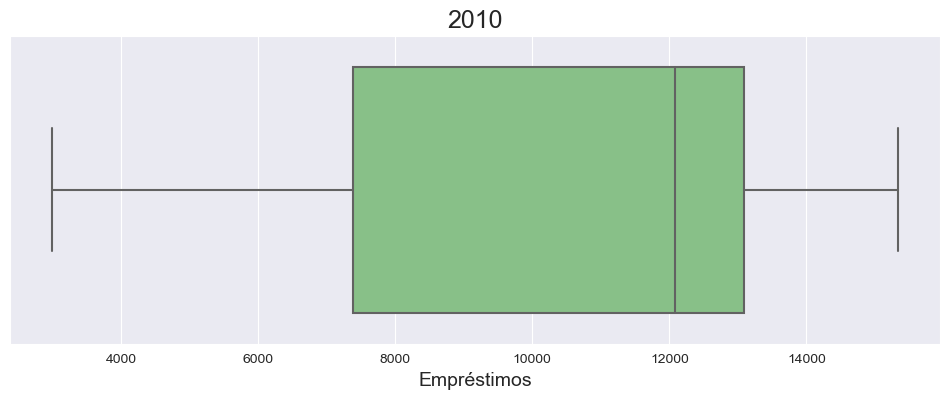

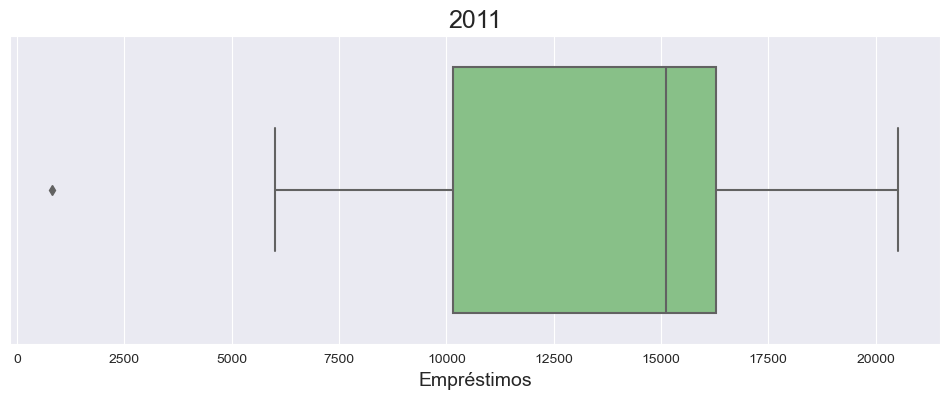

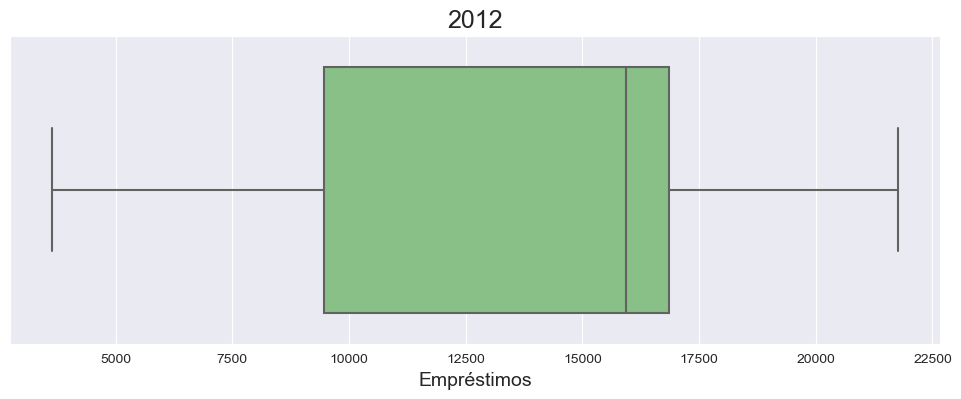

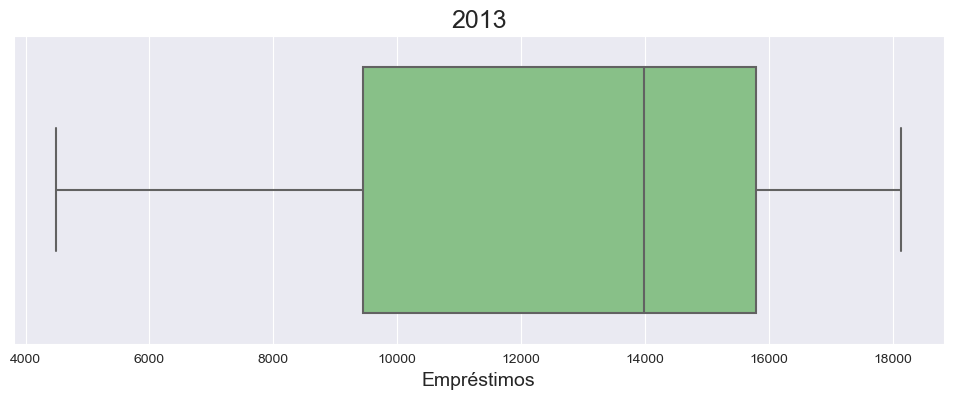

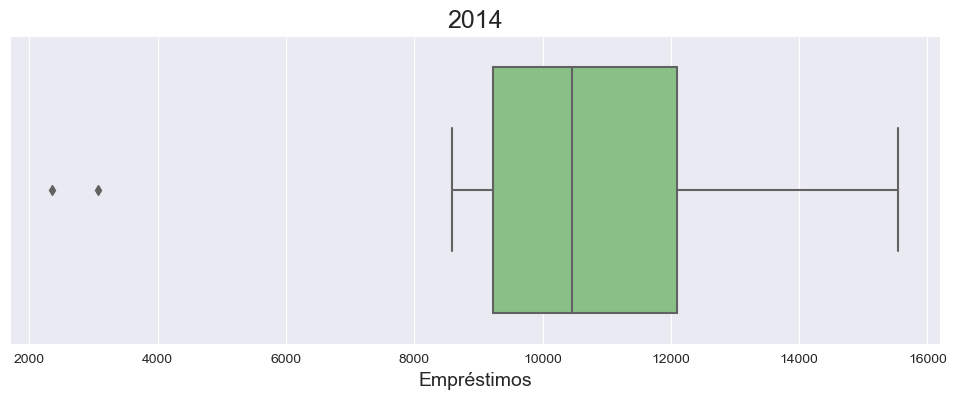

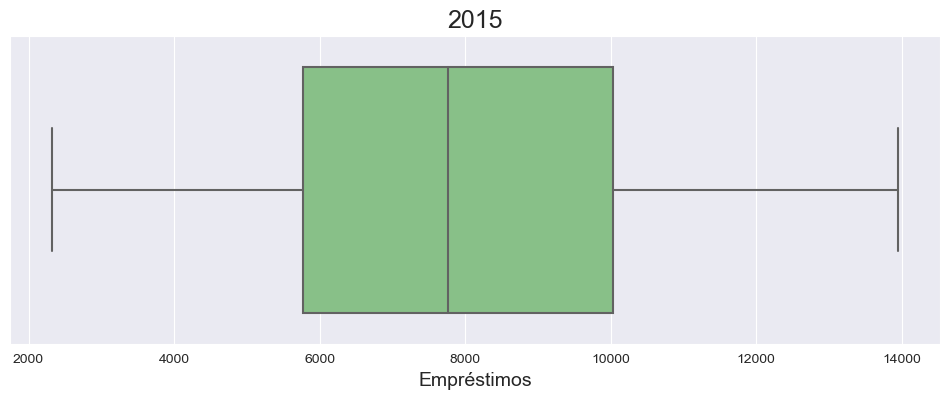

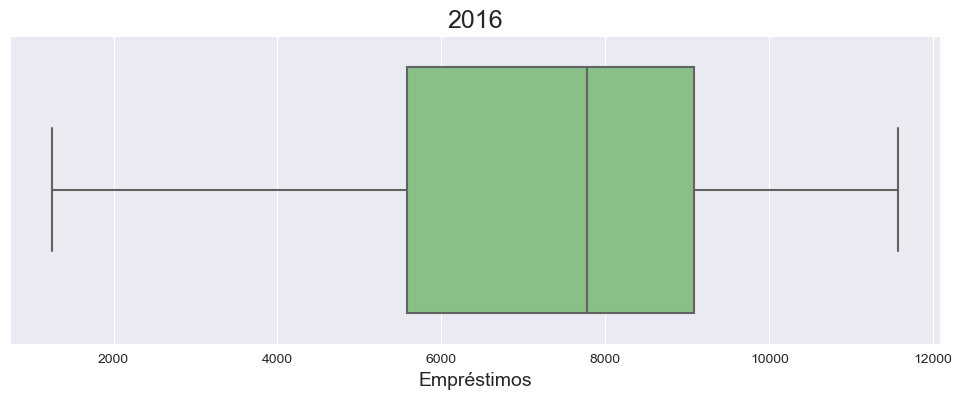

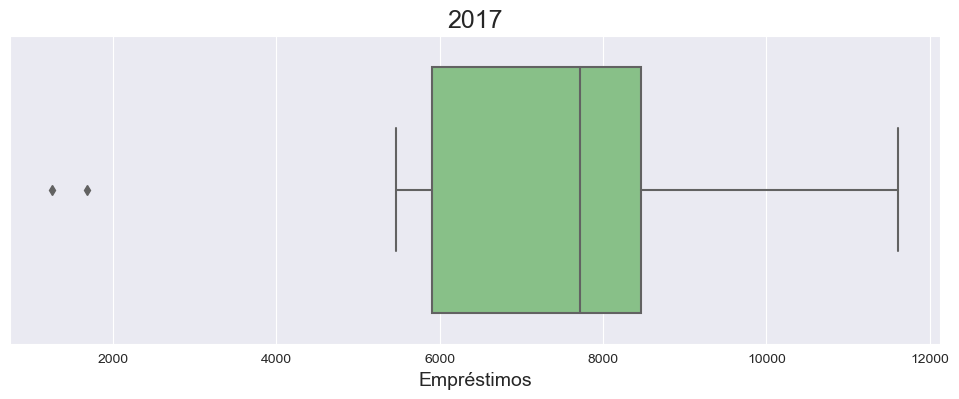

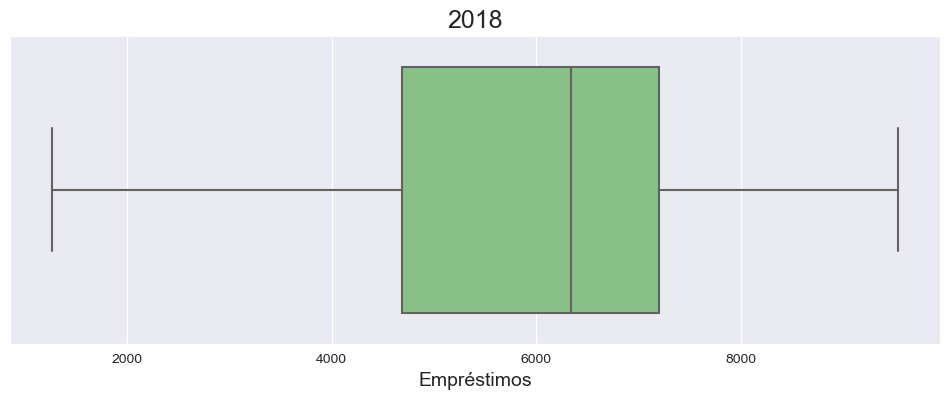

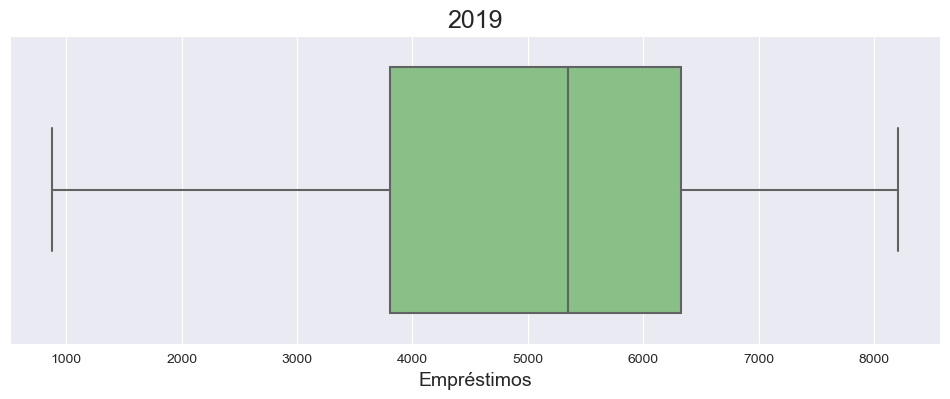

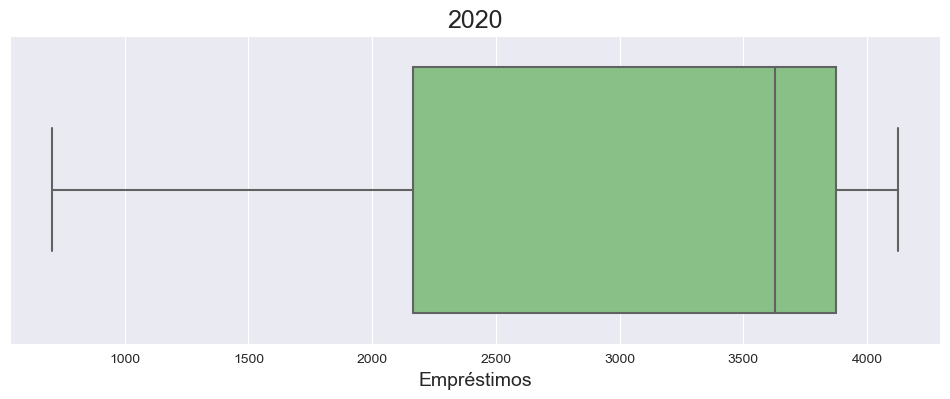

<Figure size 640x480 with 0 Axes>

In [38]:
ano = 2010 - 1
for i in range(2010, 2020 + 1):
    ano += 1
    criar_boxplot_empretimos(emprestimos_graduacao, i, ano)
    plt.figure()

In [39]:
selecao = emprestimos_completo['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO'
emprestimos_pos_graduacao = emprestimos_completo[selecao]

In [40]:
divisao_percentual("classe_geral", emprestimos_pos_graduacao)

,classe_geral
Ciências aplicadas,71.2%
Ciências sociais,16.0%
Matemática e ciências naturais,3.2%
Religião,3.0%
Generalidades. Ciência e conhecimento,2.9%
Filosofia e psicologia,2.8%
Geografia. Biografia. História,0.3%
Linguagem. Língua. Linguística,0.3%
Belas artes,0.3%


In [41]:
selecao = emprestimos_pos_graduacao['classe_geral'] == 'Ciências aplicadas'
emprestimos_pos_graduacao = emprestimos_pos_graduacao[selecao]

### Emprétimos de exemplares de Ciências aplicadas feitos a alunos da pós-graduação por ano

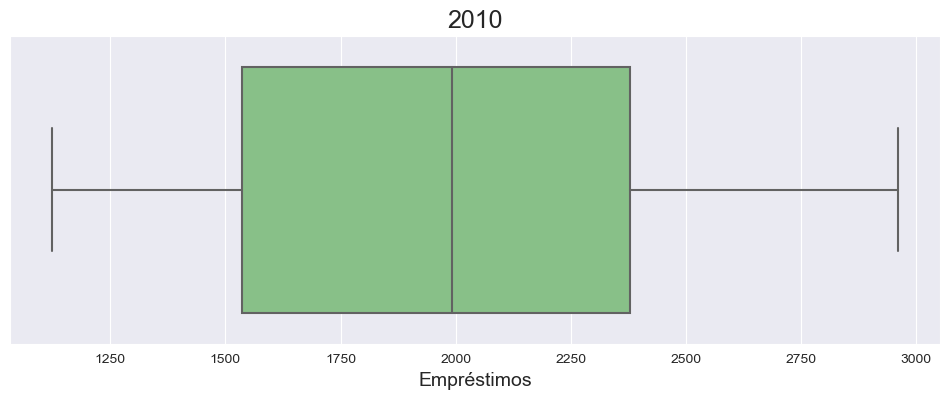

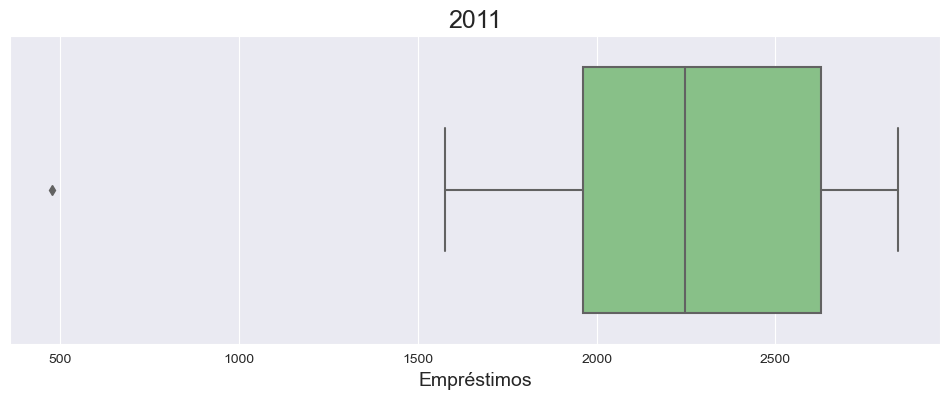

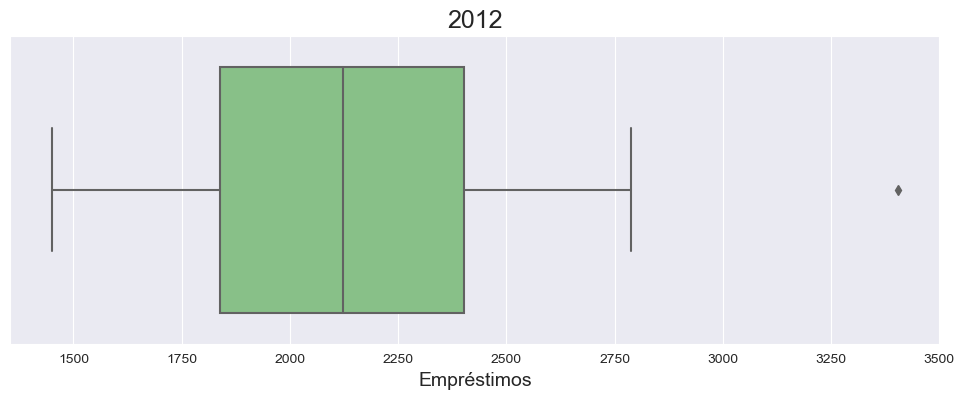

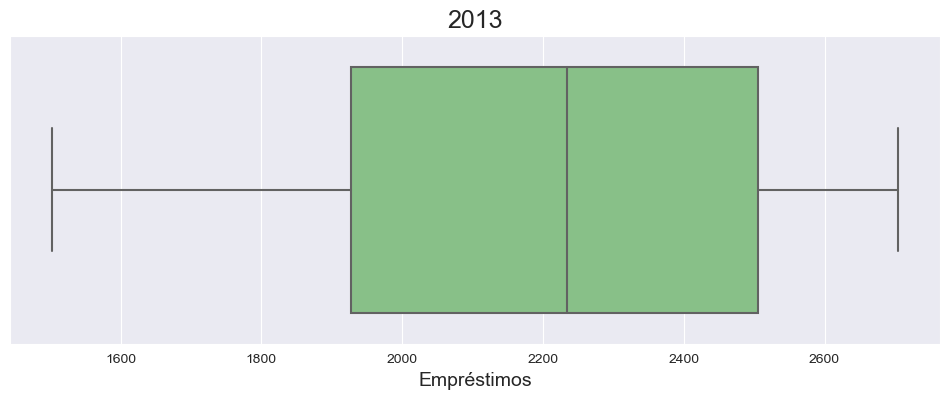

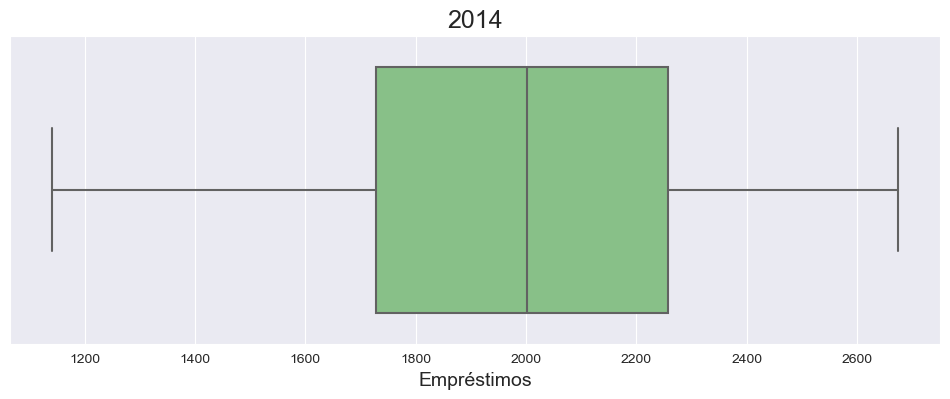

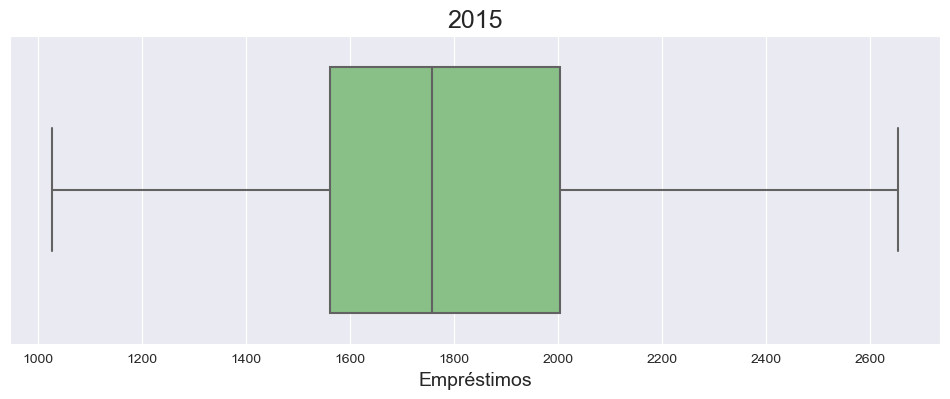

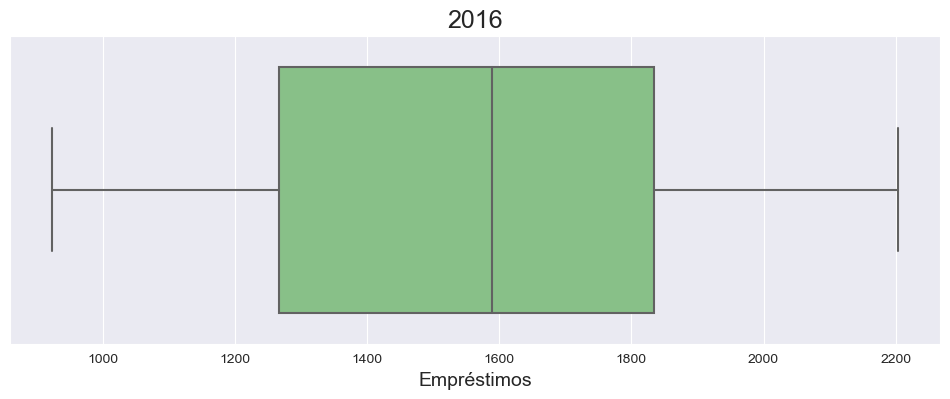

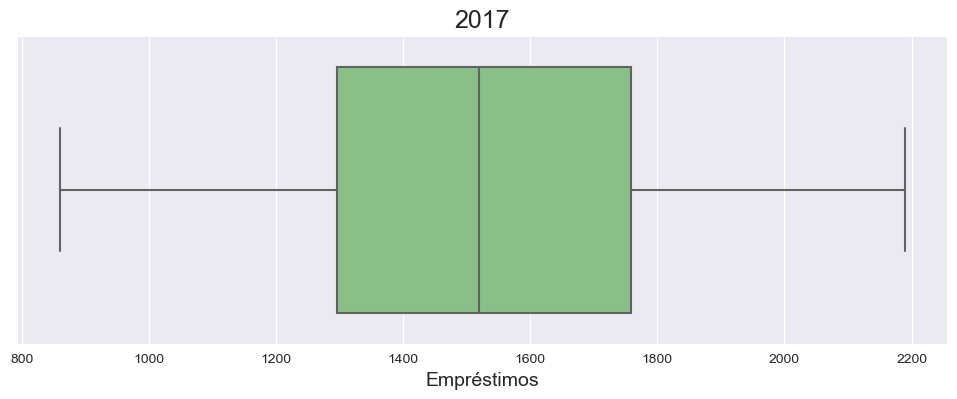

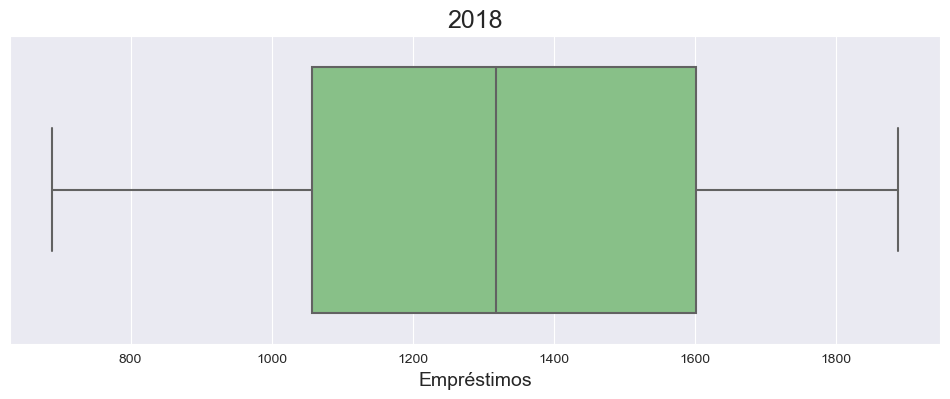

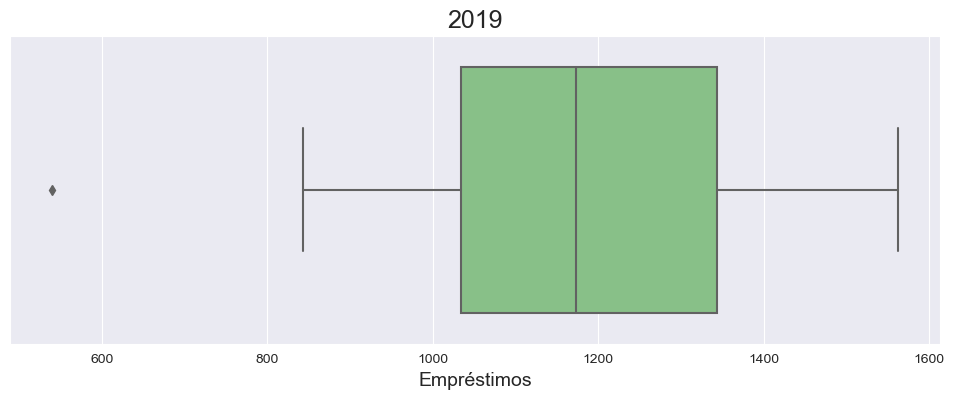

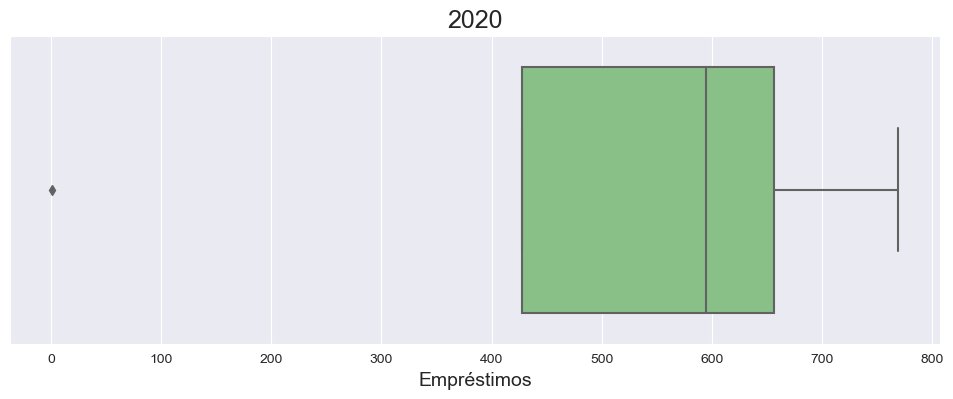

<Figure size 640x480 with 0 Axes>

In [42]:
ano = 2010 - 1
for i in range(2010, 2020 + 1):
    ano += 1
    criar_boxplot_empretimos(emprestimos_pos_graduacao, i, ano)
    plt.figure()

### Observação VII: Não diferença significativa em relação aos empréstimos, tirando o fato de que os empréstimos a graduação ocorrem em um maior volume. 

In [43]:
matricula_1 = pd.read_excel('dados/matricula_alunos.xlsx', skiprows=1)
matricula_1["Número da matrícula"] = matricula_1["Número da matrícula"].values.astype('str')

In [45]:
matricula_2 = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Python+Pandas+6%2F7%3A+%F0%9F%91%A9%F0%9F%8F%BD%E2%80%8D%F0%9F%92%BB+JSON%2C+Excel+e+Pivot_table&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Python+Pandas+-+1%C2%AA+Ed+%29+6%2F7')
matricula_2 = pd.read_json(matricula_2.registros[0])
matricula_2["matricula_ou_siape"] = matricula_2["matricula_ou_siape"].astype('str') + '.0'
matricula_2.rename(columns = {'matricula_ou_siape': 'Número da matrícula', 'tipo_vinculo_usuario': 'Tipo de vinculo', 'curso': 'Curso'}, inplace = True)

In [46]:
matriculas_completas = matricula_1.append(matricula_2)

C:\Users\User\AppData\Local\Temp\ipykernel_16672\2201369503.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matriculas_completas = matricula_1.append(matricula_2)


In [47]:
emprestimos_completo_unificado = emprestimos_completo.rename(columns = {'matricula_ou_siape': 'Número da matrícula'})

In [48]:
matriculas_emprestimos = pd.merge(matriculas_completas, emprestimos_completo_unificado, on="Número da matrícula")

In [49]:
selecao = matriculas_emprestimos['Curso'] == 'BIBLIOTECONOMIA'
biblioteconomia = matriculas_emprestimos[selecao]
selecao = matriculas_emprestimos['Curso'] == 'CIÊNCIAS SOCIAIS'
ciencias_sociais = matriculas_emprestimos[selecao]
selecao = matriculas_emprestimos['Curso'] == 'COMUNICAÇÃO SOCIAL'
comunicacao_social = matriculas_emprestimos[selecao]
selecao = matriculas_emprestimos['Curso'] == 'DIREITO'
direito = matriculas_emprestimos[selecao]
selecao = matriculas_emprestimos['Curso'] == 'FILOSOFIA'
filosofia = matriculas_emprestimos[selecao]
selecao = matriculas_emprestimos['Curso'] == 'PEDAGOGIA'
pedagogia = matriculas_emprestimos[selecao]

In [50]:
def empretimo_anual(data_frame, curso):
    emprestimo_anual = [int(i[:4]) for i in data_frame.data_emprestimo]
    contagem = Counter(emprestimo_anual)
    emprestimo_anual = pd.DataFrame.from_dict(contagem, orient='index').reset_index()
    emprestimo_anual = emprestimo_anual.sort_values('index')
    emprestimo_anual = emprestimo_anual[5:]
    emprestimo_anual = emprestimo_anual.reset_index()
    emprestimo_anual = emprestimo_anual.drop('level_0', axis = 1)
    emprestimo_anual.rename(columns = {'index': 'Ano', 0: curso}, inplace = True)
    return emprestimo_anual

In [51]:
biblioteconomia_emprestimos = empretimo_anual(biblioteconomia, 'Biblioteconomia')
ciencias_sociais_emprestimos =  empretimo_anual(ciencias_sociais, 'Ciências Sociais')
comunicacao_social_emprestimos = empretimo_anual(comunicacao_social, 'Comunicação Social')
direito_emprestimos = empretimo_anual(direito, 'Direito')
filosofia_emprestimos = empretimo_anual(filosofia, 'Filosofia')
pedagogia_emprestimos = empretimo_anual(pedagogia, 'Pedagogia')

In [52]:
emprestimos_curso_2015_a_2020 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(biblioteconomia_emprestimos, ciencias_sociais_emprestimos, on='Ano'), 
                                                           comunicacao_social_emprestimos, on='Ano'), 
                                                           direito_emprestimos,  on='Ano'), 
                                                           filosofia_emprestimos, on='Ano'), pedagogia_emprestimos, on='Ano'
                                                           )

### Tabela com emprétimos anuais para cursos de graduação 

In [53]:
emprestimos_curso_2015_a_2020

,Ano,Biblioteconomia,Ciências Sociais,Comunicação Social,Direito,Filosofia,Pedagogia
0,2015,7624,7357,7031,7520,6950,7189
1,2016,6997,6959,7954,7326,7576,7153
2,2017,7288,6908,8241,7867,7389,7434
3,2018,6377,6181,6950,7022,6296,6518
4,2019,5887,5788,5885,5860,5572,5869
5,2020,900,825,796,905,832,866


In [54]:
previsao_2022 = pd.read_fwf('dados/previsao.txt')
previsao_2022[['Curso', 'Número de emprétimos']] = previsao_2022['curso previsao_2022'].str.split(' ', expand=True)
previsao_2022['Número de emprétimos'][13] = int(previsao_2022['Unnamed: 1'][13])
previsao_2022["Número de emprétimos"] = previsao_2022["Número de emprétimos"].values.astype('int')
previsao_2022.drop(['curso previsao_2022', 'Unnamed: 1'], axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16672\3092425093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao_2022['Número de emprétimos'][13] = int(previsao_2022['Unnamed: 1'][13])


In [55]:
matricula_pos = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Python+Pandas+6%2F7%3A+%F0%9F%91%A9%F0%9F%8F%BD%E2%80%8D%F0%9F%92%BB+JSON%2C+Excel+e+Pivot_table&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Python+Pandas+-+1%C2%AA+Ed+%29+6%2F7')
matricula_pos = pd.read_json(matricula_pos.registros[1])
matricula_pos["matricula_ou_siape"] = matricula_pos["matricula_ou_siape"].astype('str') + '.0'
matricula_pos.rename(columns = {'matricula_ou_siape': 'Número da matrícula', 'tipo_vinculo_usuario': 'Tipo de vinculo', 'curso': 'Curso'}, inplace = True)

In [56]:
emprestimos_pos = emprestimos_pos_graduacao.rename(columns = {'matricula_ou_siape': 'Número da matrícula'})

In [57]:
matriculas_emprestimos_pos = pd.merge(matricula_pos, emprestimos_pos, on="Número da matrícula")

In [58]:
matriculas_emprestimos_pos.Curso.unique()

array(['CIÊNCIAS ODONTOLÓGICAS', 'ENGENHARIA DE SOFTWARE',
       'ARQUITETURA E URBANISMO', 'FILOSOFIA', 'ARTES CÊNICAS',
       'CIÊNCIA, TECNOLOGIA E INOVAÇÃO',
       'GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO', 'BIOQUÍMICA',
       'ADMINISTRAÇÃO', 'BIOINFORMÁTICA', 'DESIGN',
       'CIÊNCIA E ENGENHARIA DE MATERIAIS', 'ENGENHARIA CIVIL',
       'CIÊNCIAS DA SAÚDE'], dtype=object)

In [59]:
selecao = matriculas_emprestimos_pos['Curso'] == 'CIÊNCIAS ODONTOLÓGICAS'
ciencias_odontologicas = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'ENGENHARIA DE SOFTWARE'
engenharia_software = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'ARQUITETURA E URBANISMO'
arquitetura_e_urbanismo = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'FILOSOFIA'
filosofia = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'ARTES CÊNICAS'
artes_cenicas = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO'
gestao_da_informacao_e_do_conhecimento = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'BIOQUÍMICA'
bioquimica = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'ADMINISTRAÇÃO'
administracao = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'BIOINFORMÁTICA'
bioinformatica = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'DESIGN'
design = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'CIÊNCIA E ENGENHARIA DE MATERIAIS'
ciencia_e_engenharia_de_materiais = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'ENGENHARIA CIVIL'
engenharia_civil = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'CIÊNCIAS DA SAÚDE'
ciencias_da_saude = matriculas_emprestimos_pos[selecao]
selecao = matriculas_emprestimos_pos['Curso'] == 'CIÊNCIA, TECNOLOGIA E INOVAÇÃO'
ciencia_tecnologia_e_inovacao = matriculas_emprestimos_pos[selecao]

In [60]:
def criando_tabela(DataFrame, nome_curso, titulo):
    lista = [int(i[:4]) for i in DataFrame.data_emprestimo]
    contagem = Counter(lista)
    emprestimo_anual = pd.DataFrame.from_dict(contagem, orient='index').reset_index()
    emprestimo_anual = emprestimo_anual.sort_values('index')
    emprestimo_anual = emprestimo_anual[7:]
    emprestimo_anual = emprestimo_anual[:-1]
    for i in previsao_2022.Curso:
        if i == nome_curso:
            emprestimo_anual = emprestimo_anual.append({'index': 2022, 0: previsao_2022['Número de emprétimos'][[previsao_2022[previsao_2022['Curso'] == nome_curso].index[0]][0]]}, ignore_index=True)
            emprestimo_anual.rename(columns = {'index': 'Ano', 0: 'valor total'}, inplace = True)
    emprestimo_anual['aumento'] = emprestimo_anual['valor total'].pct_change()
    emprestimo_anual = emprestimo_anual.set_index('Ano')
    emprestimo_anual[titulo] = emprestimo_anual['aumento'].map(lambda x: '{:.2f}%'.format(x * 100))
    emprestimo_anual = emprestimo_anual.drop(['aumento', 'valor total'], axis = 1)
    multi_index = pd.MultiIndex.from_product([['Mudança em %'], emprestimo_anual.columns])
    emprestimo_anual.columns = multi_index
    return emprestimo_anual

In [61]:
ciencias_odontologicas = criando_tabela(ciencias_odontologicas, 'ciencias_odontologicas', 'CIÊNCIAS ODONTOLÓGICAS')
engenharia_software = criando_tabela(engenharia_software, 'engenharia_software', 'ENGENHARIA DE SOFTWARE')
arquitetura_e_urbanismo = criando_tabela(arquitetura_e_urbanismo, 'arquitetura_e_urbanismo', 'ARQUITETURA E URBANISMO')
filosofia = criando_tabela(filosofia, 'filosofia', 'FILOSOFIA')
artes_cenicas = criando_tabela(artes_cenicas, 'artes_cenicas', 'ARTES CÊNICAS')
gestao_da_informacao_e_do_conhecimento = criando_tabela(gestao_da_informacao_e_do_conhecimento, 'gestao_da_informacao_e_do_conhecimento', 'GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO')
bioquimica = criando_tabela(bioquimica, 'bioquimica', 'BIOQUÍMICA')
administracao = criando_tabela(administracao, 'administracao', 'ADMINISTRAÇÃO')
bioinformatica = criando_tabela(bioinformatica, 'bioinformatica', 'BIOINFORMÁTICA')
design = criando_tabela(design, 'design', 'DESIGN')
ciencia_e_engenharia_de_materiais = criando_tabela(ciencia_e_engenharia_de_materiais, 'ciencia_e_engenharia_de_materiais', 'CIÊNCIA E ENGENHARIA DE MATERIAIS')
engenharia_civil = criando_tabela(engenharia_civil, 'engenharia_civil', 'ENGENHARIA CIVIL')
ciencias_da_saude = criando_tabela(ciencias_da_saude, 'ciencias_da_saude', 'CIÊNCIAS DA SAÚDE')
ciencia_tecnologia_e_inovacao = criando_tabela(ciencia_tecnologia_e_inovacao, 'ciencia_tecnologia_e_inovacao', 'CIÊNCIA, TECNOLOGIA E INOVAÇÃO')

C:\Users\User\AppData\Local\Temp\ipykernel_16672\3749704220.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emprestimo_anual = emprestimo_anual.append({'index': 2022, 0: previsao_2022['Número de emprétimos'][[previsao_2022[previsao_2022['Curso'] == nome_curso].index[0]][0]]}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16672\3749704220.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emprestimo_anual = emprestimo_anual.append({'index': 2022, 0: previsao_2022['Número de emprétimos'][[previsao_2022[previsao_2022['Curso'] == nome_curso].index[0]][0]]}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16672\3749704220.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emprestimo_anual =

In [62]:
imprestimos_2017_a_2022 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(ciencias_odontologicas, engenharia_software, on='Ano'), 
                                                           arquitetura_e_urbanismo, on='Ano'), 
                                                           filosofia,  on='Ano'), 
                                                           artes_cenicas, on='Ano'), 
                                    gestao_da_informacao_e_do_conhecimento, on='Ano'),
                                                                   bioquimica, on='Ano'),
                                                                   administracao, on='Ano'),
                                                                   bioinformatica, on='Ano'),
                                                                               design, on='Ano'),
                                                                   ciencia_e_engenharia_de_materiais, on='Ano'),
                                                                                       engenharia_civil, on='Ano'),
                                                                                         ciencias_da_saude, on='Ano'),ciencia_tecnologia_e_inovacao, on='Ano')

### Tabela com mudança percentutal nos empréstimos na pós-graduação (2017 a 2022)

In [63]:
imprestimos_2017_a_2022 = imprestimos_2017_a_2022.transpose()
imprestimos_2017_a_2022

Ano                                                  2017     2018     2019  \
Mudança em % CIÊNCIAS ODONTOLÓGICAS                  nan%   -5.21%  -14.69%   
             ENGENHARIA DE SOFTWARE                  nan%  -12.83%  -17.95%   
             ARQUITETURA E URBANISMO                 nan%  -17.07%   -2.33%   
             FILOSOFIA                               nan%   -5.75%  -10.08%   
             ARTES CÊNICAS                           nan%   -7.14%  -13.65%   
             GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO  nan%  -19.37%  -11.87%   
             BIOQUÍMICA                              nan%  -17.46%   -1.91%   
             ADMINISTRAÇÃO                           nan%  -14.04%  -30.30%   
             BIOINFORMÁTICA                          nan%  -18.25%   -8.56%   
             DESIGN                                  nan%  -15.28%   -5.75%   
             CIÊNCIA E ENGENHARIA DE MATERIAIS       nan%  -12.35%   -7.74%   
             ENGENHARIA CIVIL                        nan%  -14.21%   -8.81%   
             CIÊNCIAS DA SAÚDE                       nan%  -17.35%   -7.73%   
             CIÊNCIA, TECNOLOGIA E INOVAÇÃO          nan%  -11.93%  -17.55%   

Ano                                                     2022  
Mudança em % CIÊNCIAS ODONTOLÓGICAS                  118.04%  
             ENGENHARIA DE SOFTWARE                   90.52%  
             ARQUITETURA E URBANISMO                  88.47%  
             FILOSOFIA                                87.12%  
             ARTES CÊNICAS                           101.05%  
             GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO  104.75%  
             BIOQUÍMICA                              103.90%  
             ADMINISTRAÇÃO                           114.53%  
             BIOINFORMÁTICA                          156.63%  
             DESIGN                                   99.79%  
             CIÊNCIA E ENGENHARIA DE MATERIAIS        89.44%  
             ENGENHARIA CIVIL                         83.56%  
             CIÊNCIAS DA SAÚDE                        78.90%  
             CIÊNCIA, TECNOLOGIA E INOVAÇÃO           90.48%